# Урок 3

## Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

### Генеральная совокупность и выборка

__Генеральная совокупность__ — это множество, которое содержит данные обо всех объектах, соответствующих определённым характеристикам.

__Выборка__ — это случайным образом выбранная часть генеральной совокупности.

По выборкам можно оценивать характеристики рассматриваемых объектов. Например, если дана выборка из значений некоторой случайной величины, с помощью этой выборки можно попытаться оценить параметры этой выборки.


__Статистика__ — это любая функция от выборки.

Познакомимся со статистиками на примере датасета с данными по хоккеистам. Данные доступны [здесь](https://habr.com/post/301340/).

In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

Импортируем и подготовим данные.

In [2]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251', parse_dates=['birth'])

df = df.drop_duplicates(['name', 'birth'])

Пусть дана выборка $x = (x_1, x_2, \dots, x_m)$ из значений одномерной случайной величины. Одной из наиболее естественных статистик таких выборок является __среднее арифметическое__ (или __выборочное среднее__):

$$\overline{x} = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m x_i.$$

Выборочное среднее является оценкой для математического ожидания.

__Пример 1__

Найдем выборочное среднее роста хоккеистов из датасета по формуле.

In [5]:
mean_height = df['height'].sum() / df['height'].count()
mean_height

183.829386763813

Эту же величину можно вычислить сразу с помощью метода `.mean`.

In [6]:
df['height'].mean()

183.829386763813

Другой важной статистикой выборки является __среднее квадратическое отклонение__:

$$\sigma = \sqrt{\dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2}.$$

Оно показывает уровень «разброса» элементов выборки относительно выборочного среднего.

__Пример 2__

Посчитаем среднее квадратическое отклонение роста хоккеистов.

In [8]:
(df['height'] - df['height'].mean()) ** 2

0         1.370335
1        17.394015
2         3.346656
3        33.981750
4        77.958071
5        84.100147
6        61.299297
7         0.687882
8        14.664203
9        33.981750
10       10.052788
11        1.370335
12      200.806279
13       77.958071
14       33.981750
15        8.005429
16      103.441374
17        4.711562
18        0.029109
19       33.981750
20       77.958071
21       10.052788
22       14.664203
23       17.394015
24        3.346656
25        3.346656
26       77.958071
27       17.394015
28       38.076468
29        8.005429
           ...    
6248     14.664203
6249      0.029109
6250      0.029109
6251      3.346656
6256      0.029109
6257     26.735241
6258     14.664203
6259      4.711562
6260     10.052788
6262     14.664203
6264     14.664203
6267     77.958071
6268     51.417694
6269     17.394015
6272     77.958071
6273     33.981750
6274     51.417694
6275     77.958071
6277     77.958071
6278      1.370335
6279     51.417694
6282     17.

In [9]:
height_std = np.sqrt(((df['height'] - df['height'].mean()) ** 2).sum() / df['height'].count())
height_std

5.46679870562426

Эту же величину можно вычислить сразу с помощью метода `.std`.

In [13]:
df['height'].std(ddof=0)

5.46679870562426

Дисперсию случайной величины можно оценивать средним квадратическим отклонением выборки, возведённым в квадрат:

$$\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$


Такая оценка дисперсии называется __смещённой выборочной дисперсией__.

__Пример 3__

Посчитаем дисперсию роста хоккеистов.

In [12]:
height_variance = ((df['height'] - df['height'].mean()) ** 2).sum() / df['height'].count()
height_variance

29.885888087815086

__Несмещённая__ (или __исправленная__) __выборочная дисперсия__ вычисляется немного иначе:

$$\sigma_{\text{unbiased}}^2 = \dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$

Почему несмещённая?

На самом деле каждый объект из выборки — это тоже случайная величина (поскольку выбирается _случайным_ образом). В таком случае и любая статистика (т.е. функция от выборки) является случайной величиной.

Оценка некоторого параметра случайной величины называется __несмещённой__, если математическое ожидание этой оценки равняется реальному значению этого параметра.

Например, выборочное среднее является несмещённой оценкой математического ожидания.

Оказывается, среднее квадратическое отклонение, возведённое в квадрат, не является несмещённой оценкой реальной дисперсии: если берётся выборка $x = (x_1, x_2, \dots, x_m)$ из значений случайной величины $X$, то

$$M(\sigma^2) = \dfrac{m - 1}{m} \cdot D(X).$$

Поэтому для оценки дисперсии используется именно несмещённая выборочная дисперсия.

__Пример 4__

Посчитаем несмещённую выборочную дисперсию роста хоккеистов.

In [16]:
height_variance2 = ((df['height'] - df['height'].mean())**2).sum() / (df['height'].count() - 1)
height_variance2

29.894963668771

Оценки дисперсии можно посчитать с помощью метода `.var`. Смещённая:

In [18]:
df['height'].var(ddof=0)

29.885888087815086

и несмещённая:

In [19]:
df['height'].var(ddof=1)

29.894963668771

Аргумент `ddof` (_Delta Degrees of Freedom_) указывает то, какую величину нужно отнять от числа наблюдений $m$, которое находится в формуле дисперсии в делителе.

### Мода,  медиана, квантиль

__Мода__ — наиболее часто встречающееся в выборке значение. Мода оценивает самое вероятное значение случайной величины.

Вычисление моды отличается для дискретных и _непрерывных_ случайных величин (о последних мы поговорим позже). Поэтому для примера возьмём какой-нибудь дискретный признак из наших данных. Таковым является, например, вес: он в таблице представлен целыми числами. 

__Пример 5__

Для начала посмотрим, как часто встречаются в выборке те или иные значения веса. Это можно сделать с помощью метода `.value_counts`:

In [22]:
df['weight'].value_counts()

90.0     225
88.0     213
80.0     203
85.0     199
86.0     182
84.0     179
83.0     159
82.0     159
93.0     151
91.0     149
87.0     147
92.0     133
89.0     133
95.0     121
78.0      93
94.0      86
98.0      81
81.0      73
100.0     73
96.0      69
79.0      66
75.0      54
77.0      43
97.0      40
76.0      39
99.0      31
74.0      28
72.0      23
103.0     23
104.0     17
101.0     17
73.0      16
102.0     13
105.0     13
70.0       9
106.0      7
108.0      6
71.0       6
110.0      4
109.0      3
107.0      2
117.0      2
112.0      1
116.0      1
81.5       1
65.0       1
Name: weight, dtype: int64

Чаще всего встречается значение $90$. Это и есть мода. Её можно также посчитать с помощью метода `.mode`:

In [23]:
df['weight'].mode()

0    90.0
dtype: float64

__Медиана выборки__ — такое значение $a$, что ровно половина элементов из выборки меньше, либо равна $a$ (и, соответственно, ровно половина больше, либо равна $a$).

__Пример 6__

Посчитаем медиану роста хоккеистов.

In [38]:
df['height'].median()

184.0

Понятие __квантиля__ обобщает понятие медианы. Если $\alpha \in (0, 1)$, то квантилем порядка $\alpha$ называется такое значение $X_\alpha$, что

$$P(X \leq X_\alpha) \geq \alpha, \text{ } P(X \geq X_\alpha) \geq 1 - \alpha.$$

На практике это означает, что ровно доля $\alpha$ от всех значений выборки оказываются меньше, либо равны $X_\alpha$ и, наоборот, доля $1 - \alpha$ от значений больше, либо равны $X_\alpha$.

В частности, медиана является квантилем порядка $0.5$. Кроме того, часто используют

* __первый квартиль__ — квантиль порядка $0.25$ (т.е. значение, которое не превышают $25 \%$ значений из выборки),
* __второй квартиль__ — то же, что и медиана,
* __третий квартиль__ — квантиль порядка $0.75$.

Квантили можно посчитать с помощью метода `.quantile`:

__Пример 7__

Посчитаем несколько квантилей роста хоккеистов.

In [39]:
df['height'].quantile(0.5)

184.0

В этот метод можно подать список значений, тогда посчитаются различные квантили:

In [40]:
df['height'].quantile([0.25, 0.5, 0.75])

0.25    180.0
0.50    184.0
0.75    188.0
Name: height, dtype: float64

__Интерквартильный размах__ — это отрезок между первым и третьим квартилями. Это отрезок, в который попадают $50 \%$ значений выборки.

Интерквартильный размах используется для измерения разброса значений выборки вокруг среднего. Иногда его использование оказывается более предпочтительным, чем использование среднего квадратического отклонения, поскольку не учитывает выбросы в данных.

Например, в наших данных интерквартильный размах — это отрезок от $180$ до $188$. _Интерквартильное расстояние_ в этом случае равно $8$.

В зависимости от задачи и удобства могут также встречаться __децили__ и __перцентили__.

__Децили__ — то же, что и квартили, но делим мы не на $4$ части, а на $10$. Например, медиана будет _пятым децилем_.

__Перцентили__ — это просто другой способ задать квантиль. Здесь мы используем не долю $\alpha \in (0, 1)$, а процент. Например, третий квартиль будет $75$-перцентилем.

### Графическое представление данных

Для визуализации распределения значений выборки часто используется гистограмма. Как строится гистограмма?

1. По оси $x$ откладываются всевозможные значения из выборки. 
2. Вся ось разбивается на какое-то заданное число одинаковых отрезков.
3. Для каждого отрезка вычисляется число значений выборки, которые лежат в этом отрезке, и это число откладывается по оси $y$.

__Пример 8__

Построим гистограмму значений роста. Для этого можно использовать метод `.hist`. В качестве аргумента `bins` сюда подаётся то число одинаковых отрезков, на которое мы разбиваем ось $x$.

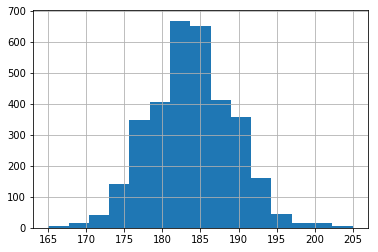

In [49]:
df['height'].hist(bins=15)

Построим гистограмму ещё раз, указав в качестве аргумента `bins` число $20$, чтобы получить более детальную картину:

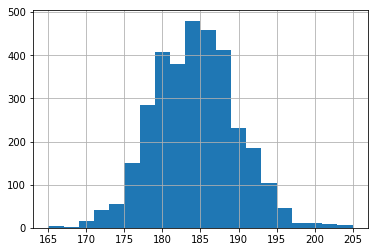

In [57]:
df['height'].hist(bins=20)

Другой способ визуализировать одномерные данные — __boxplot__ или __ящик с усами__. В самом ящике отмечены квартили $Q1$, $Q2$ (медиана), $Q3$. «Усы» здесь — границы отрезка
$\left[ Q1 - 1.5 \times IQR, \text{ } Q3 + 1.5 \times IQR \right],$
где $IQR$ — интерквартильное расстояние.

__Пример 9__

Построим `boxplot` роста хоккеистов.

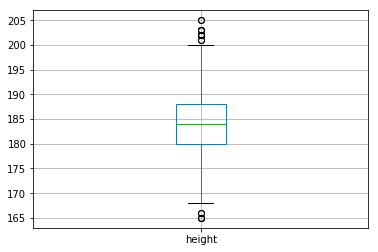

In [58]:
df[['height']].boxplot()

Всё, что выходит за границы этого отрезка, считается выбросами (отмечены кружками). Посчитаем, сколько значений роста оказалось за пределами «усов».

In [61]:
q1 = df['height'].quantile(0.25)
q3 = df['height'].quantile(0.75)

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(168.0, 200.0)

In [62]:
outliers = df.loc[(df['height'] < boxplot_range[0]) | (df['height'] > boxplot_range[1])]

outliers.shape[0]

19

Доля выбросов:

In [63]:
outliers.shape[0] / df.shape[0]

0.005768063145112325

### Упражнения

__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
```
Без использования статистических функций вроде `mean`, `std`, `var`, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

__Задача 2__

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из `boxplot`. В этой задаче можно использовать статистические функции.

__Задача 3__

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

_Замечание_: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.